In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


In [2]:
data = pd.read_csv("Fraud_Analysis_Dataset(in).csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11142 entries, 0 to 11141
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            11142 non-null  int64  
 1   type            11142 non-null  object 
 2   amount          11142 non-null  float64
 3   nameOrig        11142 non-null  object 
 4   oldbalanceOrg   11142 non-null  float64
 5   newbalanceOrig  11142 non-null  float64
 6   nameDest        11142 non-null  object 
 7   oldbalanceDest  11142 non-null  float64
 8   newbalanceDest  11142 non-null  float64
 9   isFraud         11142 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 870.6+ KB


In [4]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,11142.000000,1.114200e+04,1.114200e+04,1.114200e+04,1.114200e+04,1.114200e+04,11142.000000
mean,8.717645,2.131915e+05,9.241173e+05,8.249576e+05,8.883541e+05,1.103211e+06,0.102495
std,16.067479,7.600650e+05,2.143004e+06,2.089894e+06,2.601376e+06,2.982447e+06,0.303312
min,1.000000,2.390000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,2.000000,4.946618e+03,4.270000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,6.000000,1.676126e+04,2.816950e+04,4.420605e+03,0.000000e+00,0.000000e+00,0.000000
75%,7.000000,1.543366e+05,3.040855e+05,1.114126e+05,2.711555e+05,3.186374e+05,0.000000
max,95.000000,1.000000e+07,1.990000e+07,1.300000e+07,3.300000e+07,3.460000e+07,1.000000


In [5]:
data.shape

(11142, 10)

In [6]:
print("\n Transaction Type Distribution by Fraud Status:")
print(data['isFraud'].head(1))


 Transaction Type Distribution by Fraud Status:
0    1
Name: isFraud, dtype: int64


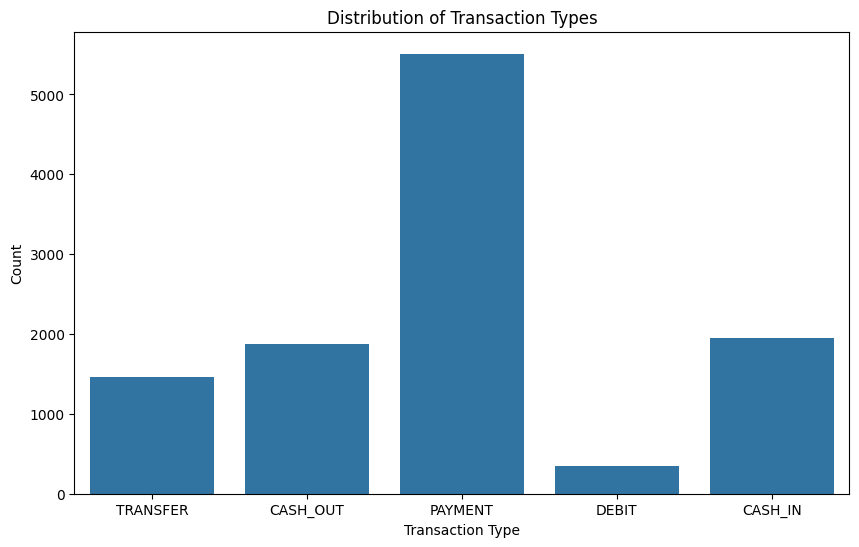

In [7]:
plt.figure(figsize=(10, 6))
sns.countplot(x='type', data=data)
plt.title('Distribution of Transaction Types')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()


C:\conda_temp\ipykernel_22604\4166483185.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='type', y='isFraud', data=fraud_rate, palette='viridis')


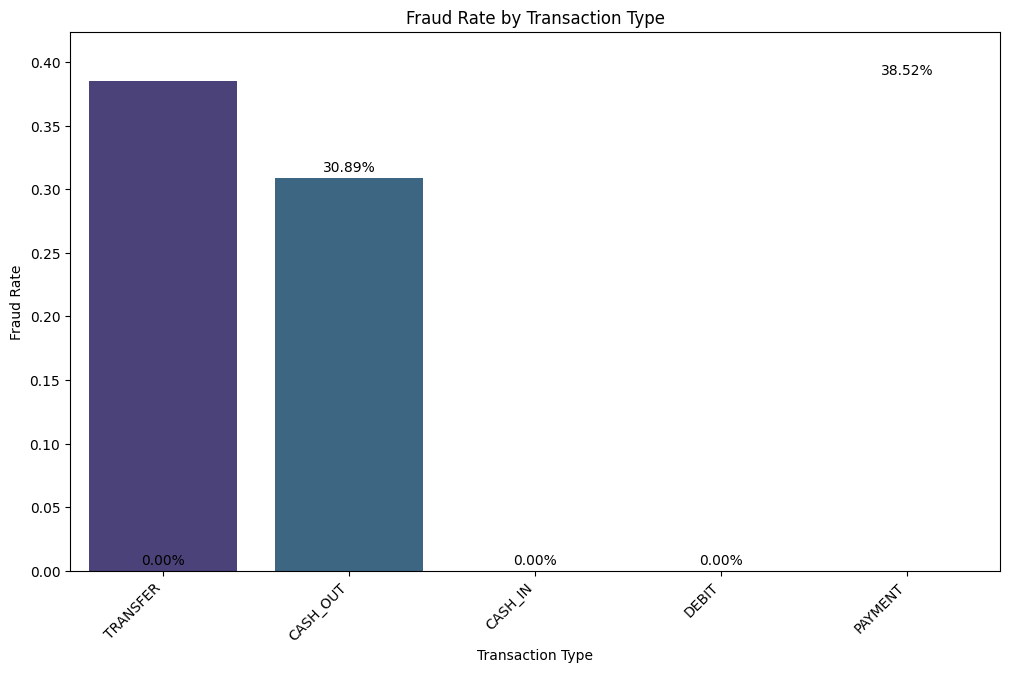

In [8]:
fraud_rate = data.groupby('type')['isFraud'].mean().reset_index()
fraud_rate = fraud_rate.sort_values(by='isFraud', ascending=False)

plt.figure(figsize=(12, 7))
sns.barplot(x='type', y='isFraud', data=fraud_rate, palette='viridis')



plt.title('Fraud Rate by Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('Fraud Rate')
plt.ylim(0, fraud_rate['isFraud'].max() * 1.1)

plt.xticks(rotation=45, ha='right')

for i, row in fraud_rate.iterrows():
    plt.text(i, row['isFraud'] + 0.005, f'{row["isFraud"]:.2%}', ha='center')

plt.show()


In [9]:
data['amount'].describe().astype(int)

count       11142
mean       213191
std        760065
min             2
25%          4946
50%         16761
75%        154336
max      10000000
Name: amount, dtype: int64

In [10]:
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

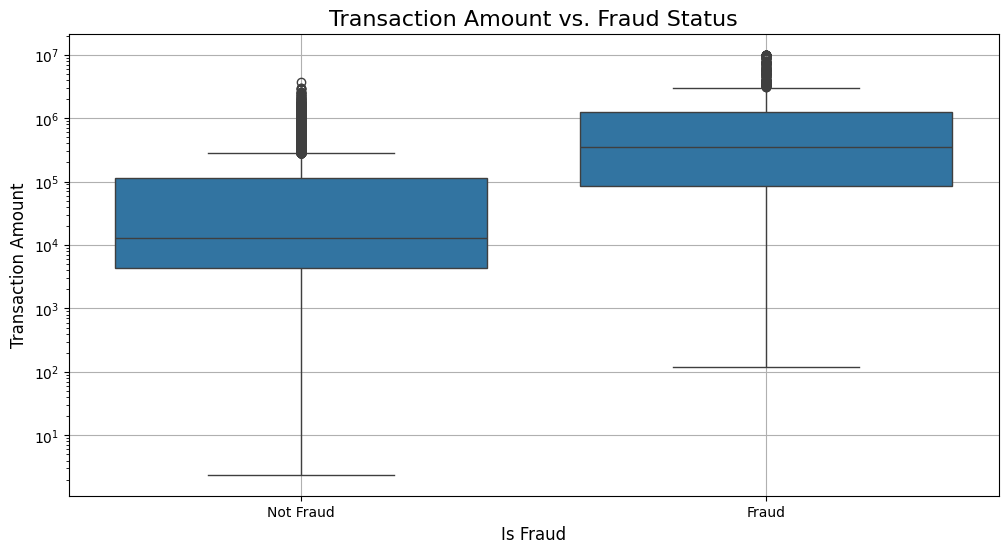

In [11]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='isFraud', y='amount', data=data)
plt.title('Transaction Amount vs. Fraud Status', fontsize=16)
plt.xlabel('Is Fraud', fontsize=12)
plt.ylabel('Transaction Amount', fontsize=12)
plt.yscale('log')
plt.xticks([0, 1], ['Not Fraud', 'Fraud'])
plt.grid(True)
plt.show()


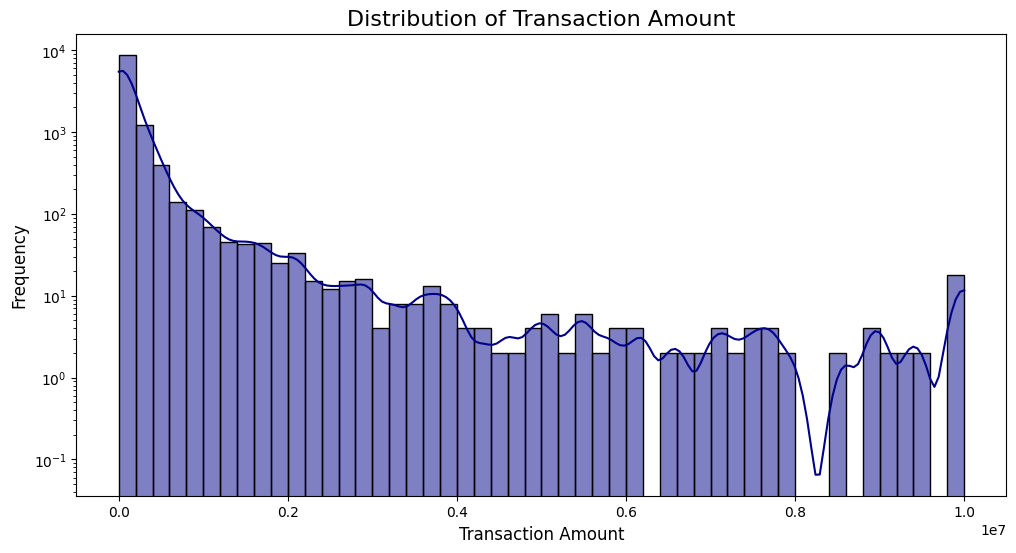

In [12]:
plt.figure(figsize=(12, 6))
sns.histplot(data['amount'], bins=50, kde=True, color='darkblue')
plt.title('Distribution of Transaction Amount', fontsize=16)
plt.xlabel('Transaction Amount', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.yscale('log')
plt.show()

In [13]:
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [14]:
data['balancedifforg'] = data['oldbalanceOrg'] - data['newbalanceOrig']
data['balancediffdest'] = - data['newbalanceDest'] - data['oldbalanceDest']

In [15]:
negative_balance_count = (data["balancedifforg"] < 0).sum()
print("Number of negative balances:", negative_balance_count)


Number of negative balances: 1921


In [16]:
negative_dest_balance_count = (data["balancediffdest"] < 0).sum()
print("Number of negative destination balances:", negative_dest_balance_count)


Number of negative destination balances: 5067


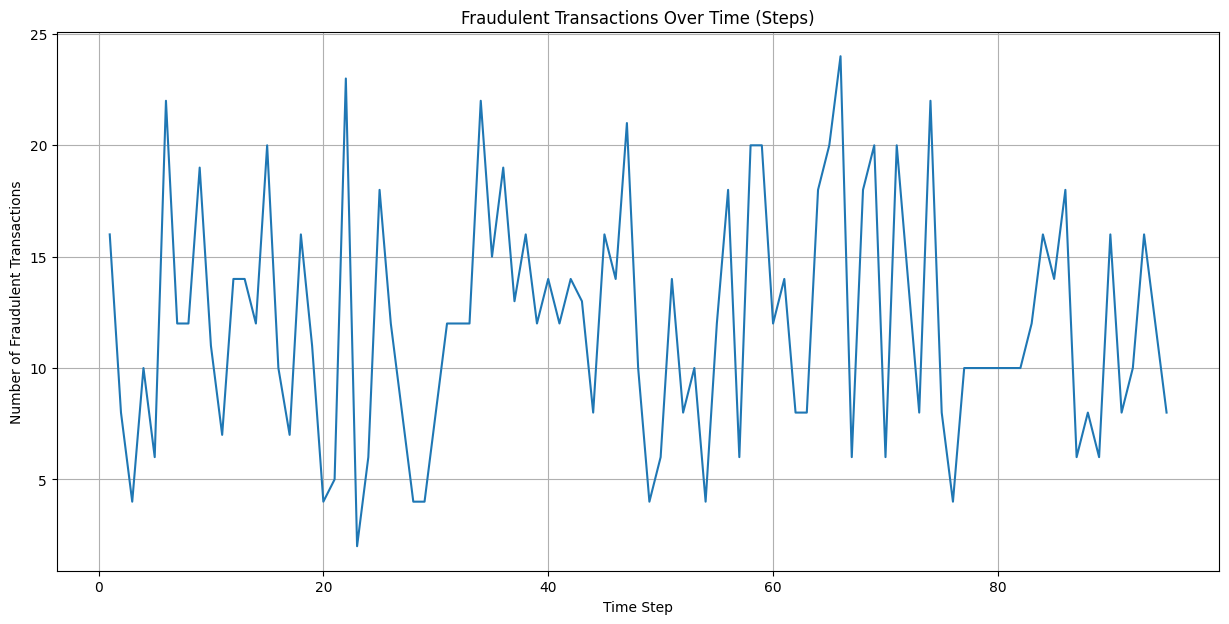

In [17]:
import matplotlib.pyplot as plt


fraud_per_step = data.groupby('step')['isFraud'].sum().reset_index()


plt.figure(figsize=(15, 7))
plt.plot(fraud_per_step['step'], fraud_per_step['isFraud'])

plt.title('Fraudulent Transactions Over Time (Steps)')
plt.xlabel('Time Step')
plt.ylabel('Number of Fraudulent Transactions')
plt.grid(True)

plt.show()


In [18]:
corr = data[['amount',"oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest","isFraud"]].corr()
corr

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
amount,1.000000,0.323943,-0.007816,0.094117,0.227413,0.435490
oldbalanceOrg,0.323943,1.000000,0.937024,0.207628,0.209787,0.046445
newbalanceOrig,-0.007816,0.937024,1.000000,0.234148,0.190314,-0.127912
oldbalanceDest,0.094117,0.207628,0.234148,1.000000,0.928831,-0.056575
newbalanceDest,0.227413,0.209787,0.190314,0.928831,1.000000,-0.002864
isFraud,0.435490,0.046445,-0.127912,-0.056575,-0.002864,1.000000


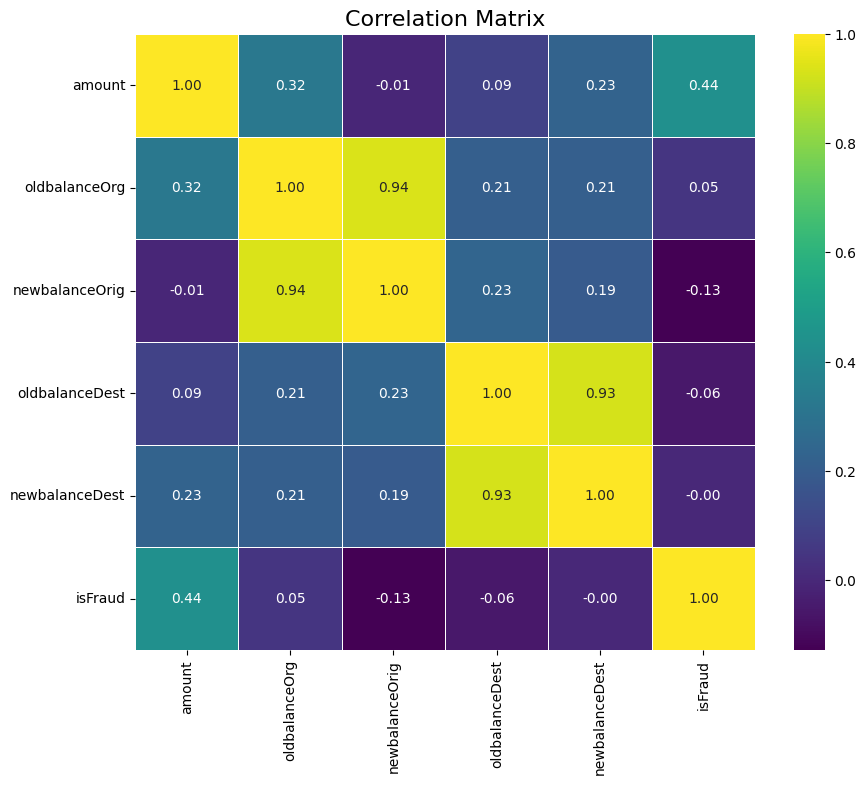

In [19]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='viridis', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix', fontsize=16)
plt.show()

In [20]:
zero_after_transfer = data[ (data['oldbalanceOrg'] > 0 ) & (data['newbalanceOrig'] == 0) & (data["type"].isin(['TRANSFER', 'CASH_OUT']))]

In [21]:
len(zero_after_transfer)

1791

In [22]:
# feature engineering


In [23]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,balancedifforg,balancediffdest
0,1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1,181.0,-0.0
1,1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1,181.0,-21182.0
2,1,TRANSFER,2806.0,C1420196421,2806.0,0.0,C972765878,0.0,0.0,1,2806.0,-0.0
3,1,CASH_OUT,2806.0,C2101527076,2806.0,0.0,C1007251739,26202.0,0.0,1,2806.0,-26202.0
4,1,TRANSFER,20128.0,C137533655,20128.0,0.0,C1848415041,0.0,0.0,1,20128.0,-0.0


In [24]:
data_new = data.drop(["step","nameOrig","nameDest"], axis=1)

In [25]:
data_new.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,balancedifforg,balancediffdest
0,TRANSFER,181.0,181.0,0.0,0.0,0.0,1,181.0,-0.0
1,CASH_OUT,181.0,181.0,0.0,21182.0,0.0,1,181.0,-21182.0
2,TRANSFER,2806.0,2806.0,0.0,0.0,0.0,1,2806.0,-0.0
3,CASH_OUT,2806.0,2806.0,0.0,26202.0,0.0,1,2806.0,-26202.0
4,TRANSFER,20128.0,20128.0,0.0,0.0,0.0,1,20128.0,-0.0


In [26]:
num = ["amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest"]
cat = ["type"]

In [27]:
X = data_new.drop('isFraud', axis=1)
y = data_new['isFraud']

In [28]:
X.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,balancedifforg,balancediffdest
0,TRANSFER,181.0,181.0,0.0,0.0,0.0,181.0,-0.0
1,CASH_OUT,181.0,181.0,0.0,21182.0,0.0,181.0,-21182.0
2,TRANSFER,2806.0,2806.0,0.0,0.0,0.0,2806.0,-0.0
3,CASH_OUT,2806.0,2806.0,0.0,26202.0,0.0,2806.0,-26202.0
4,TRANSFER,20128.0,20128.0,0.0,0.0,0.0,20128.0,-0.0


In [29]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: isFraud, dtype: int64

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
scaler = StandardScaler()

In [32]:
X_train[num] = scaler.fit_transform(X_train[num])
X_test[num] = scaler.transform(X_test[num])

In [33]:
encoder = OneHotEncoder()

X_train_cat_encoded = encoder.fit_transform(X_train[cat])
X_test_cat_encoded = encoder.transform(X_test[cat])

In [34]:
X_train_cat_encoded_df = pd.DataFrame(X_train_cat_encoded.toarray(), columns=encoder.get_feature_names_out(cat), index=X_train.index)
X_test_cat_encoded_df = pd.DataFrame(X_test_cat_encoded.toarray(), columns=encoder.get_feature_names_out(cat), index=X_test.index)

In [35]:
X_train_num = X_train.drop(cat, axis=1)
X_test_num = X_test.drop(cat, axis=1)

X_train_processed = pd.concat([X_train_num, X_train_cat_encoded_df], axis=1)
X_test_processed = pd.concat([X_test_num, X_test_cat_encoded_df], axis=1)



In [36]:
print("Processed Training Data Head:")
print(X_train_processed.head())

print("\nProcessed Test Data Head:")
print(X_test_processed.head())

Processed Training Data Head:
         amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
10619 -0.273189      -0.416970       -0.382490       -0.342812   
10887 -0.264125       3.171985        3.326565       -0.326872   
6749  -0.268802      -0.431157       -0.394926       -0.342812   
9233   0.771378      -0.431157       -0.394926        2.229187   
7131  -0.274133      -0.409034       -0.373949       -0.342812   

       newbalanceDest  balancedifforg  balancediffdest  type_CASH_IN  \
10619       -0.371238         4536.73            -0.00           0.0   
10887       -0.361433       -11609.71        -69192.28           1.0   
6749        -0.371238            0.00            -0.00           0.0   
9233         3.034328            0.00     -16518936.04           0.0   
7131        -0.371238         3799.78            -0.00           0.0   

       type_CASH_OUT  type_DEBIT  type_PAYMENT  type_TRANSFER  
10619            0.0         0.0           1.0            0.0  
10887       

In [37]:
log = LogisticRegression(max_iter=1000)
log.fit(X_train_processed, y_train)

LogisticRegression(max_iter=1000)

In [38]:
y_pred = log.predict(X_test_processed)

In [39]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9650067294751009


In [40]:
classification = classification_report(y_test, y_pred)
print("Classification Report:\n", classification)

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1999
           1       0.96      0.69      0.80       230

    accuracy                           0.97      2229
   macro avg       0.96      0.84      0.89      2229
weighted avg       0.96      0.97      0.96      2229



In [41]:
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion)

Confusion Matrix:
 [[1993    6]
 [  72  158]]


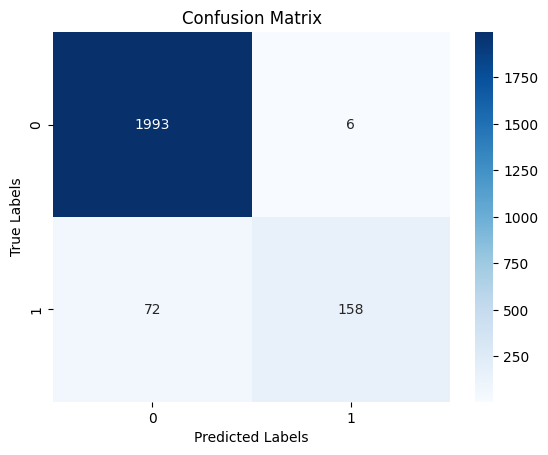

In [42]:
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [43]:
# random forest

ran = RandomForestClassifier(n_estimators = 100, random_state = 42)
ran.fit(X_train_processed, y_train)

RandomForestClassifier(random_state=42)

In [44]:
y_pred = ran.predict(X_test_processed)

In [45]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9946164199192463


In [46]:
classification = classification_report(y_test, y_pred)
print("Classification Report:\n", classification)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1999
           1       0.98      0.97      0.97       230

    accuracy                           0.99      2229
   macro avg       0.99      0.98      0.99      2229
weighted avg       0.99      0.99      0.99      2229



In [47]:
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion)

Confusion Matrix:
 [[1994    5]
 [   7  223]]


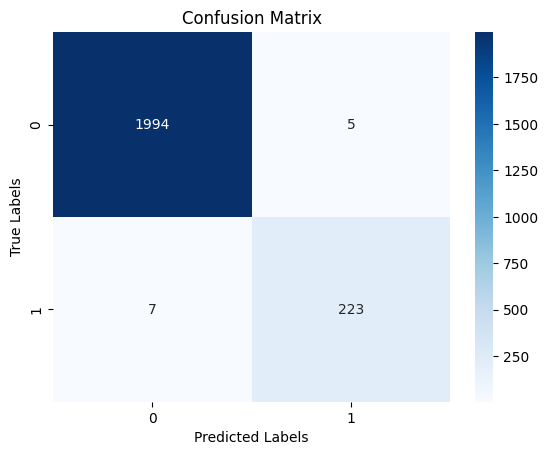

In [48]:
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [49]:
#XG Boost

xgb = XGBClassifier( use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train_processed, y_train)

c:\Conda\envs\ml_pro\lib\site-packages\xgboost\training.py:183: UserWarning: [13:40:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [50]:
y_pred = xgb.predict(X_test_processed)


In [51]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9955136832660386


In [52]:
classification = classification_report(y_test, y_pred)
print("Classification Report:\n", classification)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1999
           1       0.98      0.98      0.98       230

    accuracy                           1.00      2229
   macro avg       0.99      0.99      0.99      2229
weighted avg       1.00      1.00      1.00      2229



In [53]:
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion)

Confusion Matrix:
 [[1994    5]
 [   5  225]]


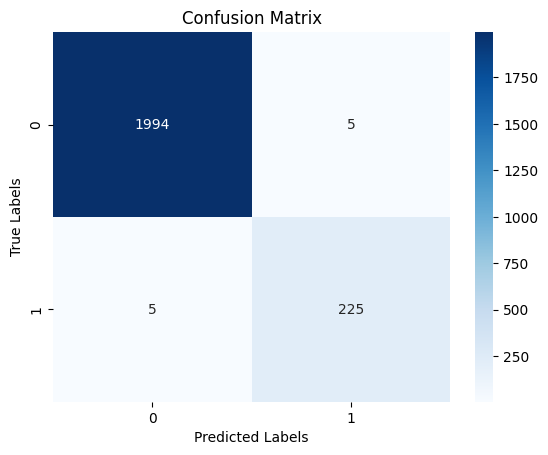

In [54]:
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Logistic Regression AUC: 0.9834
Random Forest AUC: 0.9971
XGBoost AUC: 0.9979


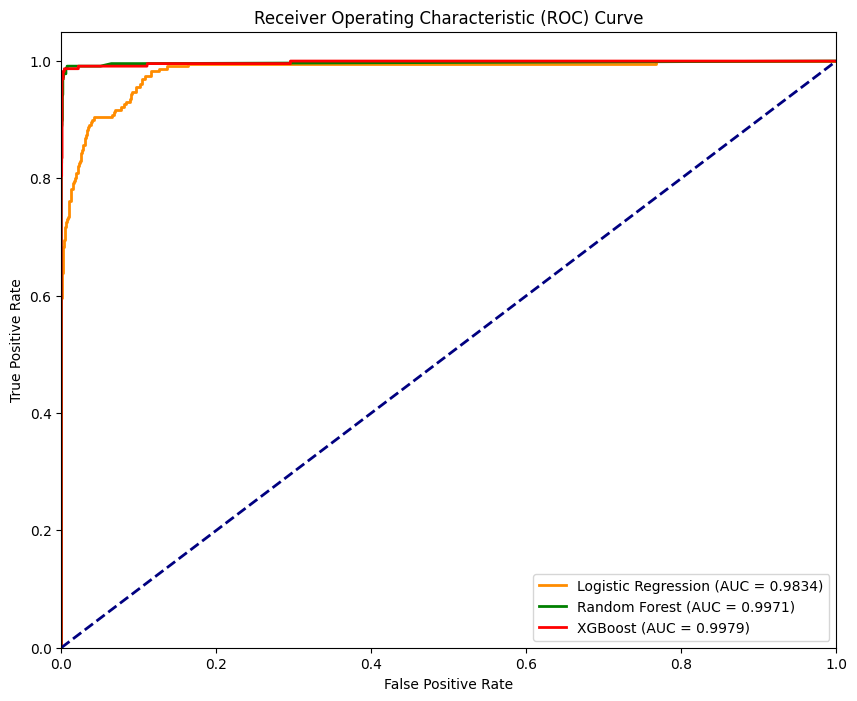

In [55]:


import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


y_pred_prob_log = log.predict_proba(X_test_processed)[:, 1]
fpr_log, tpr_log, thresholds_log = roc_curve(y_test, y_pred_prob_log)
auc_log = auc(fpr_log, tpr_log)

print(f"Logistic Regression AUC: {auc_log:.4f}")


y_pred_prob_ran = ran.predict_proba(X_test_processed)[:, 1]
fpr_ran, tpr_ran, thresholds_ran = roc_curve(y_test, y_pred_prob_ran)
auc_ran = auc(fpr_ran, tpr_ran)

print(f"Random Forest AUC: {auc_ran:.4f}")


y_pred_prob_xgb = xgb.predict_proba(X_test_processed)[:, 1]
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_pred_prob_xgb)
auc_xgb = auc(fpr_xgb, tpr_xgb)

print(f"XGBoost AUC: {auc_xgb:.4f}")


plt.figure(figsize=(10, 8))
plt.plot(fpr_log, tpr_log, color='darkorange', lw=2, label=f'Logistic Regression (AUC = {auc_log:.4f})')
plt.plot(fpr_ran, tpr_ran, color='green', lw=2, label=f'Random Forest (AUC = {auc_ran:.4f})')
plt.plot(fpr_xgb, tpr_xgb, color='red', lw=2, label=f'XGBoost (AUC = {auc_xgb:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [56]:
result = {}
for model_name, model in [("Logistic Regression", log),
                          ("Random Forest", ran),
                          ("XGBoost", xgb)]:
                          print(f"\n-->Model: {model_name}")
                          y_pred = model.predict(X_test_processed)
                          accuracy = accuracy_score(y_test, y_pred)
                          print(f"*** Accuracy: {accuracy:.2f}")


-->Model: Logistic Regression
*** Accuracy: 0.97

-->Model: Random Forest
*** Accuracy: 0.99

-->Model: XGBoost
*** Accuracy: 1.00


In [57]:
joblib.dump(xgb, 'XGBoost.pkl')

['XGBoost.pkl']